<a id='title'></a>
# <bold><font color=gray>Jupyter App:</font><font color=darkpink> A Student's Analysis of his Domestic Thermal Footprint</font></bold>

## <font size=5 color=darkpink>Abstract:</font>

Concerned with utility costs during summer peak months, ideas on how to reduce spending came up. Before making any big ticket commitments, we started looking at ways to improve utility efficiencies.  We lacked current information about the "domestic thermal qualities" or HVAC and insulation efficiencies, so we set out to study the impact of the environment on our home's a/c usage as well as assess the a/c cooling abilities. <font color=black>**Methods:**</font> Raspberry Pi microcomputers were fitted with sensors to measure temperature and humidity and then stream the data to cloud. The sensors were a collection of DHT22 and DHT11 sensors, each collecting temperature and humidity. A weather polling service using python was scripted to collect the weather information in 4 parts of the city, including the area where the study was conducted. The sensors collected data each minute, while the weather poll collected every 10 minutes. <font>**Results:**</font> A week's worth of data was consumed using Panda. We found the weather fluctuates from one part of the city to another, and the humidity was negatively correlated to the temperature. Concerning indoors, the environmental elements in each room varied significantly and the humidity was weakly negatively correlated to the temperature. The hottest room we determined to be filled with electronics and had a window facing the sun - of which only minimal window covering was present. The coldest room was found to stay generally 2 degrees cooler than the remaining rooms. The ventilation system was overcooling 1 room, in order to manage the temperature in the hottest room. On a positive note, the range of humidity values collected internally showed the a/c is effective in removing humidity (see heat index). As the temperature in the majority of rooms stayed at within a consistent range near the HVAC thermostat temperature setting, we see the a/c's ability to cool is acceptable.<font>**Conclusions:**</font> A big ticket HVAC expenditure is not needed at this time. By restricting the amount of direct sunlight on the hottest room and restricting the ventilation going to the coldest room, we are hoping to balance the rates at which each room cools and reduce the amount of time the a/c is engaged. 


    
## <font size=5 color=gray>Notebook Purpose: </font><font color=darkblue>Process and Present Data using Pandas </font><font color=darkblue> including:</font>
<font color=white size=1>==========================================================================================================================================================================</font>
<font size=2  color=gray>> using </font><font color=darkblue>**JSON, Lists, Dictionaries, Loops, Dictionary Writer, Visualizing with MatPlotLib**</font>
<font color=white size=1>==========================================================================================================================================================================</font>
<font size=2  color=gray> via ugly colors and links.</font>

<a href ='#top'>Jump to Table of Contents</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href='#javascript_section'>JavaScript Section</a>

### <a id='top'></a>
<font color=black size=1>=============================================================================================================</font>
### <font size=5 color=darkpink>Table of Contents</font>
<font color=black size=1>=============================================================================================================</font>

<a href='#javascript_section'>JavaScript Section</a>

<a href='#Demo_JavaScript'>Demo JavaScript</a>

<a href='#section1'><font color=darkblue>**Section1:     Process Atlanta weather data (External Data)**</font></a>

<a href='#sec1pt1'>Part 1 - Read in raw JSON, write out CSV spreadsheet</a>

<a href='#sec1pt2'>Part 2 - Review External Data and MetaData</a>

<a href='#sec1pt3'>Part 3 - Data Edits - Format DATES</a>

<a href='#sec1pt4'>Part 4 - Breakout DataFrames by location</a>

<a href='#sec1pt5'>Part 5 - Visualize External Data for gap analysis</a>

<a href='#section2'><font color=darkblue>**Section2:     Process Home climate (Internal Data)**</font></a>

<a href='#sec2pt1'>Part 1 - Read, write and remove dups from Internal Data CSV spreadsheet</a>

<a href='#sec2pt2'>Part 2 - Review internal data current state</a>

<a href='#sec2pt3'>Part 3 - Renaming Columns and Replacing Data</a>

<a href='#sec2pt4'>Part 4 - Visualize and Assess Internal Data</a>

<a href='#section3'><font color=darkblue>**Section3:     Visualize the data**</font></a>

<a href='#sec3pt1'>Part 1 - Present external environments</a>

<a href='#sec3pt2'>Part 2 - Present internal environments</a>

<a href='#section4'><font color=darkblue>**Section4:     Comparative Analysis**</font></a>

<font color=black size=1>=============================================================================================================</font>
# <font color=darkpink size=5>JavaScript Section</font><a id='javascript_section'></a>
<font color=black size=1>=============================================================================================================</font>

<a href ='#top'>Jump to Table of Contents</a>

### <i>Start Here by installing <font color=darkblue size=5>JavaScript </font><font color=darktblue size=4>prerequisites</font> into Jupyter notebook</i>
#### <font color=darkpink size=5><b>commands:<b></font>
<font color=green>* **!pip install**</font> <font color=black size=3>pixiedust</font>
    
<font color=green>* **!pip install**</font> <font color=black size=3>pixiedust_node</font>

#(Runnable Step 1: Install and import **optional** utilities 
# This can be cloned from https://github.com/pixiedust/pixiedust_node

import pixiedust_node

<a id='Demo_JavaScript'></a>
## <font color=darkpink> Demonstrate JavaScript</font>

<a href ='#top'>Jump to Table of Contents</a>


##### <font color=white>The JavaScript flag is the first line in the cell - which is </font><font color=green>%%node</font>

%%node
#--------------------------------------------------#
# The line above, "%%node", tells Pandas this section
#    is javascript or node.js code and not python / pandas.
# The code below is just an example of using 
#    jnode.js within pandas and has nothing to
#    to with the data being presented.
#--------------------------------------------------#
var data = [];
for (var i = 0; i < 1000; i++) {
    var x = 2*Math.PI * i/360;
    var obj = {
      x: x,
      i: i,
      sin: Math.sin(x),
      cos: Math.cos(x),
      tan: Math.tan(x)
    };
    data.push(obj);
}
display(data);



<a id='section1'></a>
# <font color=darkpink>Section 1: Process Atlanta weather data (External data)</font>
<a href ='#top'>Jump to Table of Contents</a>

## <font color=darkblue>Part 1 - Read in raw JSON, write out CSV spreadsheet</font>
<font color=gray>step 1 - Edit check for valid JSON format.</font>
<a id='sec1pt1'></a>

<a href ='#top'>Jump to Table of Contents</a>

In [39]:
import csv as csv
import json
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
#------------------------------------------------#
# Set processing parameters and directives
#------------------------------------------------#
matplotlib.use('nbagg')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,12)
plt.rcParams['font.size'] = 8
#------------------------------------------------#
# Set the appropriate path
#------------------------------------------------#
home_path = 'C:\\users\\bucbo_000\\Desktop'

if os.path.isdir(home_path):
    os.chdir(home_path)
else:
    home_path='./'


#------------------------------------------------#
#Open files for JSON read and write LIST
#------------------------------------------------#
data_file = open('weather_collect.txt', "r", encoding = 'utf-8')     

#-------------------------------------------------#
# Convert json to list of dictionaries, then parse accordingly
# IF JSON is INVALID - the json.loads will error. We
# trap the error and simply move onto the next record.
#-------------------------------------------------#

f1 = data_file.readlines()
my_df = list()
for x in f1:
    try:
        data = json.loads(x) 
        df = data
        my_df.append(df)
    except:
        print("skipping: JSON format invalid for:", x)

skipping: JSON format invalid for: {"loc":"2702 Huntingdon Chase Atlanta Georgia","sysdate":"2019-05-27 05:29","temp":"67.8,"hum":"0.87,"forecast":"Partly Cloudy"}

skipping: JSON format invalid for: {"loc":"Atlanta Georgia","sysdate":"2019-05-27 05:29","temp":"70.6,"hum":"0.82,"forecast":"Partly Cloudy"}

skipping: JSON format invalid for: {"loc":"Stone Mountain Park","sysdate":"2019-05-27 05:29","temp":"70.2,"hum":"0.8,"forecast":"Partly Cloudy"}

skipping: JSON format invalid for: {"loc":"Coca-Cola Olympic Park","sysdate":"2019-05-27 05:29","temp":"72.4,"hum":"0.91,"forecast":"Mostly Cloudy"}

skipping: JSON format invalid for: {"loc":"Big Chicken Marietta Georgia","sysdate":"2019-05-27 05:29","temp":"67.2,"hum":"0.9,"forecast":"Partly Cloudy"}



<font color=gray>step 2 - Write valid data to list of dictionaries for consumption by dictionary writer, a child class of cvs module.</font>

<a href ='#top'>Jump to Table of Contents</a>

In [40]:
#------------------------------------------------#
# Define output file and header line
#------------------------------------------------#
with open('weather.csv', 'w', newline='') as csvfile:
    fieldnames = ['sysdate', 'loc', 'temp', 'hum','forecast', 'lat', 'lon']
# This opens the `DictWriter`.
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#
# Write out the header row (this only needs to be done once!).
    writer.writeheader()
#------------------------------------------------#
# Read in, Write out and Loop 
#------------------------------------------------#
    for a_df in my_df:
        try:
            writer.writerow(a_df)
        except:
            print("Unable to parse, skipping record...")

<font color=gray>step 3 - Build DataFrame from list of dictionaries.</font>

<a href ='#top'>Jump to Table of Contents</a>

In [41]:
ext_df = pd.read_csv(home_path + "\\weather.csv", usecols=range(0,5)) 

<a id='sec1pt2'></a>
## <font color=darkblue>Part 2 - Review External Data and MetaData.</font>

<a href ='#top'>Jump to Table of Contents</a>

<font color=gray>step 1 - Show beginning of DataFrame </font>


In [42]:
ext_df.head()

,sysdate,loc,temp,hum,forecast
0,2019-05-27 05:27,2702 Huntingdon Chase Atlanta Georgia,67.8,0.87,Partly Cloudy
1,2019-05-27 05:27,Atlanta Georgia,70.7,0.82,Partly Cloudy
2,2019-05-27 05:27,Stone Mountain Park,70.2,0.80,Partly Cloudy
3,2019-05-27 05:27,Coca-Cola Olympic Park,72.4,0.91,Mostly Cloudy
4,2019-05-27 05:27,Big Chicken Marietta Georgia,67.2,0.90,Partly Cloudy


## <font color=red>Discrepancy!</font>
<font color=darkgray> The </font><font color=darkorange>external</font><font color=darkgray> humidity is in </font><font color=darkorange> percentages</font><font color=darkgray> while the </font><font color=blue> internal </font><font color=darkgray> humidity is in </font><font color=blue>integers</font>

<font color=gray>Convert the humidity before moving on.</font>

In [43]:
ext_df['hum'] = (ext_df['hum'] * 100)

<font color=gray>Take sample and verify results</font>

In [44]:
ext_df.head(5)

,sysdate,loc,temp,hum,forecast
0,2019-05-27 05:27,2702 Huntingdon Chase Atlanta Georgia,67.8,87.0,Partly Cloudy
1,2019-05-27 05:27,Atlanta Georgia,70.7,82.0,Partly Cloudy
2,2019-05-27 05:27,Stone Mountain Park,70.2,80.0,Partly Cloudy
3,2019-05-27 05:27,Coca-Cola Olympic Park,72.4,91.0,Mostly Cloudy
4,2019-05-27 05:27,Big Chicken Marietta Georgia,67.2,90.0,Partly Cloudy


<font color=gray>step 2 - Review content metadata.</font>

<a href ='#top'>Jump to Table of Contents</a>

In [45]:
print("------------------------------------")
print("Weather Data has ", ext_df.shape[0], "Rows and", ext_df.shape[1], "Columns of types:")
print("------------------------------------")
print(ext_df.dtypes)
print(" ")
print("------------------------------------")
print(f"Weather Data nulls search:")
print("------------------------------------")
print(ext_df.isnull().sum())
print(" ")
print("------------------------------------")
print(f"Weather Data counts:")
print("------------------------------------")
print(ext_df.dropna().count())
print("------------------------------------")
print(f"Weather Data statistics:")
print("------------------------------------")
ext_df.describe()

------------------------------------
Weather Data has  1600 Rows and 5 Columns of types:
------------------------------------
sysdate      object
loc          object
temp        float64
hum         float64
forecast     object
dtype: object
 
------------------------------------
Weather Data nulls search:
------------------------------------
sysdate     0
loc         0
temp        0
hum         5
forecast    1
dtype: int64
 
------------------------------------
Weather Data counts:
------------------------------------
sysdate     1595
loc         1595
temp        1595
hum         1595
forecast    1595
dtype: int64
------------------------------------
Weather Data statistics:
------------------------------------


,temp,hum
count,1600.000000,1595.000000
mean,80.692750,61.838245
std,7.741839,20.489681
min,66.700000,24.000000
25%,74.075000,43.000000
50%,79.900000,63.000000
75%,87.600000,80.000000
max,95.200000,99.000000


<a id='sec1pt3'></a>
## <font color=darkblue>Part 3 -Format DATES and build indicies.</font>

<a href ='#top'>Jump to Table of Contents</a>


<font color=gray>step1 - Format the sysdate column to be a pandas DATE object</font>

In [46]:
ext_df['sysdate'] = pd.to_datetime(ext_df['sysdate'])

<font color=gray>step 2 - Validate the DATE conversion worked.</font>

<a href ='#top'>Jump to Table of Contents</a>

In [47]:
ext_df.dtypes

sysdate     datetime64[ns]
loc                 object
temp               float64
hum                float64
forecast            object
dtype: object

<font color=gray>step 3 - Build index for visualization preparation</font>

<a href ='#top'>Jump to Table of Contents</a>

In [48]:
ext_df.set_index(['sysdate'], inplace=True)

<a id='sec1pt4'></a>
## <font color=darkblue>Part 4 - Breakout DataFrames by location.</font>

<a href ='#top'>Jump to Table of Contents</a>

<font color=gray>step 1 - Create new dataframes by location in city.</font>

In [49]:
ext_atl = ext_df[ext_df['loc'] == 'Atlanta Georgia']
ext_marietta = ext_df[ext_df['loc'] == 'Big Chicken Marietta Georgia']
ext_stonemtn = ext_df[ext_df['loc'] == 'Stone Mountain Park']
ext_coke = ext_df[ext_df['loc'] == 'Coca-Cola Olympic Park']

<font color=gray>step 2 - Take sub-group sample stat to ensure dataframes built correctly.</font>

In [50]:
ext_atl['forecast'].value_counts()

Clear            229
Foggy             43
Partly Cloudy     39
Mostly Cloudy      8
Overcast           1
Name: forecast, dtype: int64

<a id='sec1pt5'></a>
## <font color=darkblue>Part 5 - Visualize External Data for gap analysis.</font>

<a href ='#top'>Jump to Table of Contents</a>

<font color=gray>step 1 - Breakout external data by groups</font>

In [51]:
ext_df.drop(columns = ['forecast']).groupby(['loc']).count()


,temp,hum
loc,,
2702 Huntingdon Chase Atlanta Georgia,320,319
Atlanta Georgia,320,319
Big Chicken Marietta Georgia,320,319
Coca-Cola Olympic Park,320,319
Stone Mountain Park,320,319


<font color=gray>step 2 - Visualize the external data's metadata that does not have nulls in data

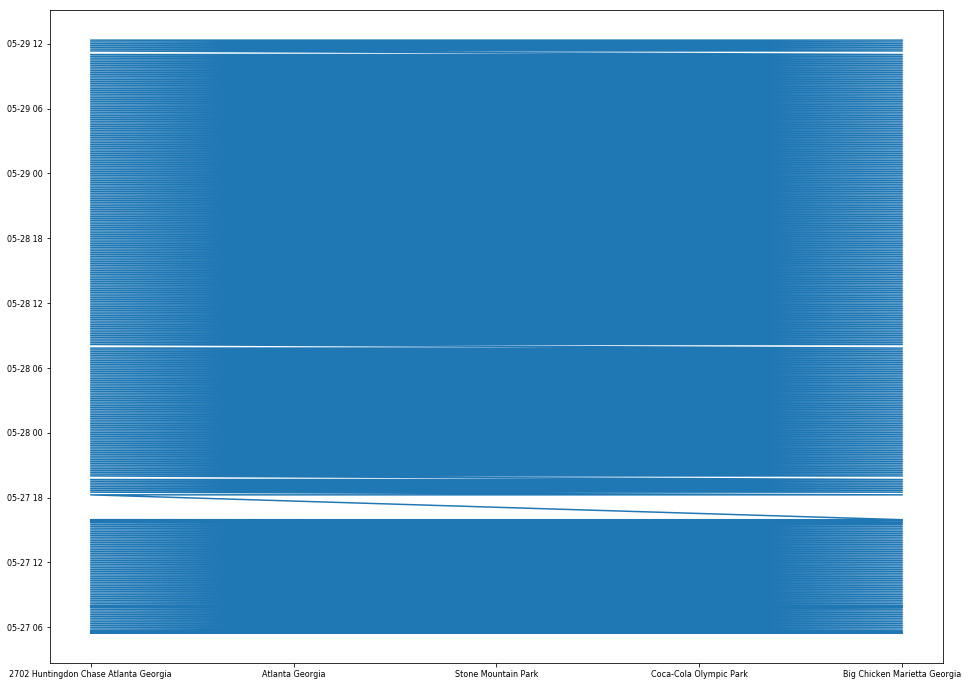

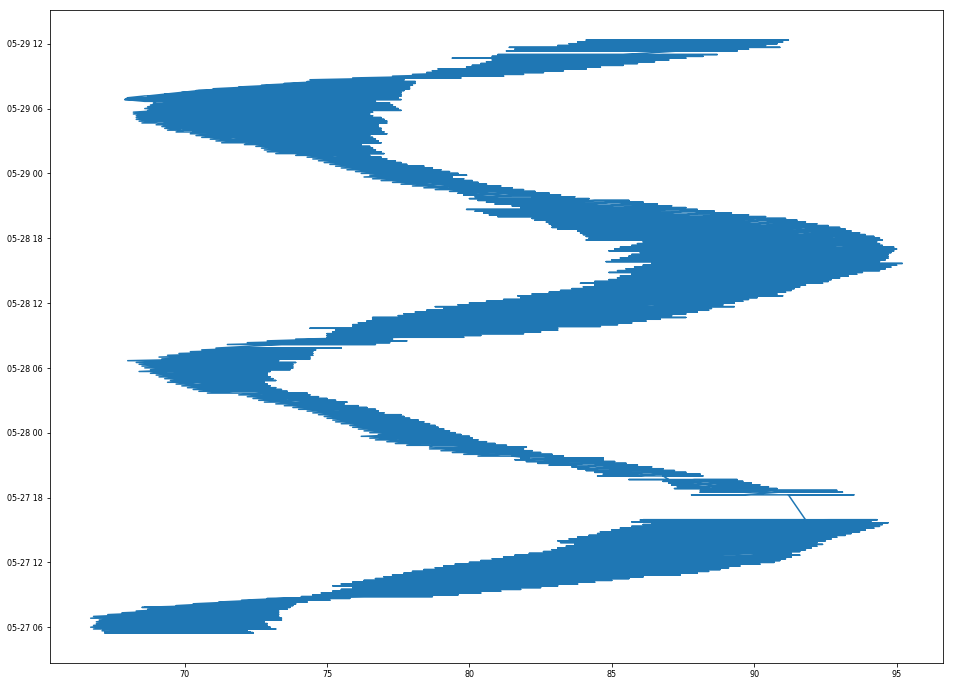

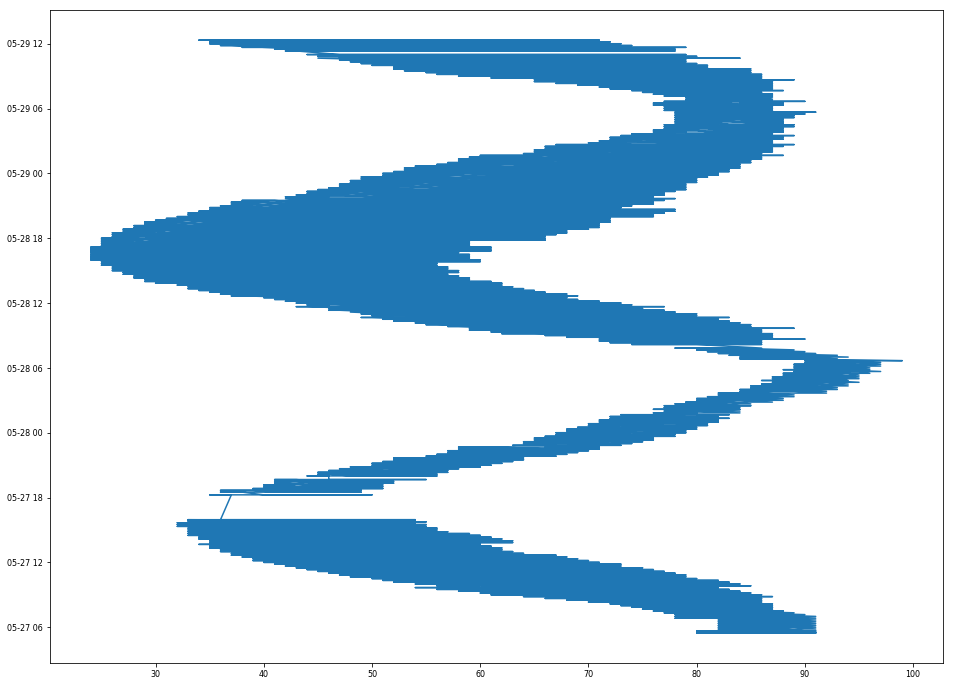

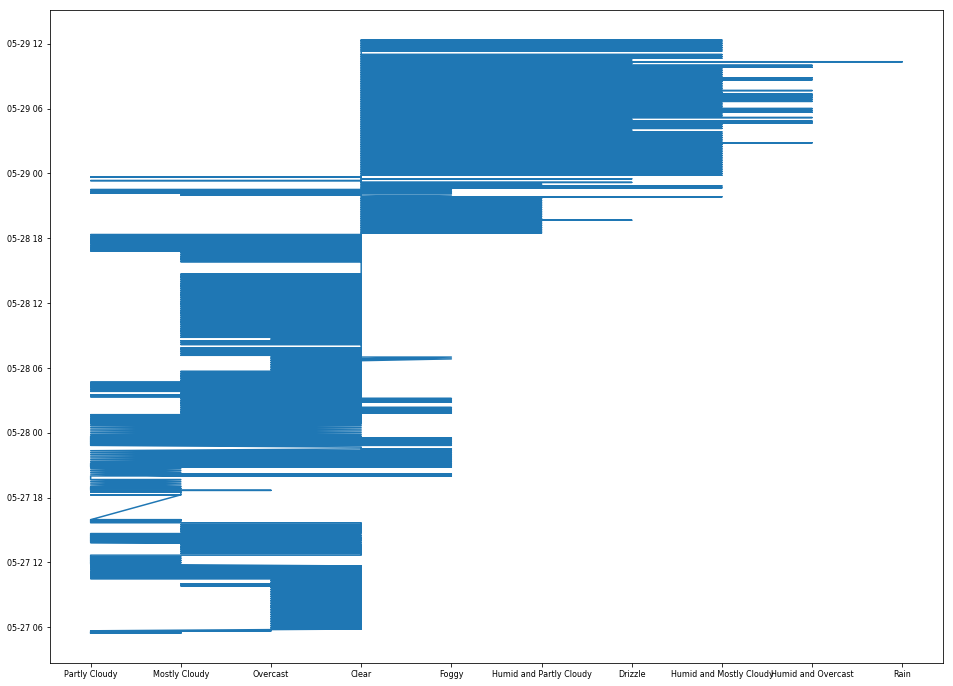

In [52]:
#----------------------------------------#
# Using dropna() function to strip all 
#    records that have nulls in them. 
# This assessment is based on this data, 
#    and should not be considered a best
#    practice.
#----------------------------------------#
for col in ext_df.columns:
    plot_data = ext_df[col].dropna()
    fig, ax = plt.subplots()
    ax.plot(plot_data.values,plot_data.index.values,  label=col)

<font color=gray>step 3 - Merge external data groups</font>

In [53]:
ow = ext_atl.join(ext_marietta, how='left', lsuffix='_atl', rsuffix='_marietta')
sw = ext_coke.join(ext_stonemtn, how='left', lsuffix='_coke', rsuffix='_stnmtn')
outside = ow.join(sw, how='left')
outside.sort_index(inplace=True)

<font color=gray>step 4 - Do basic plot as a test</font>
### <font color=darkpink> This actually discloses a lot, but avoid details, as we stay on track of presentation.</font>
### <font color = blue>We will present context in Visualization section.</font>

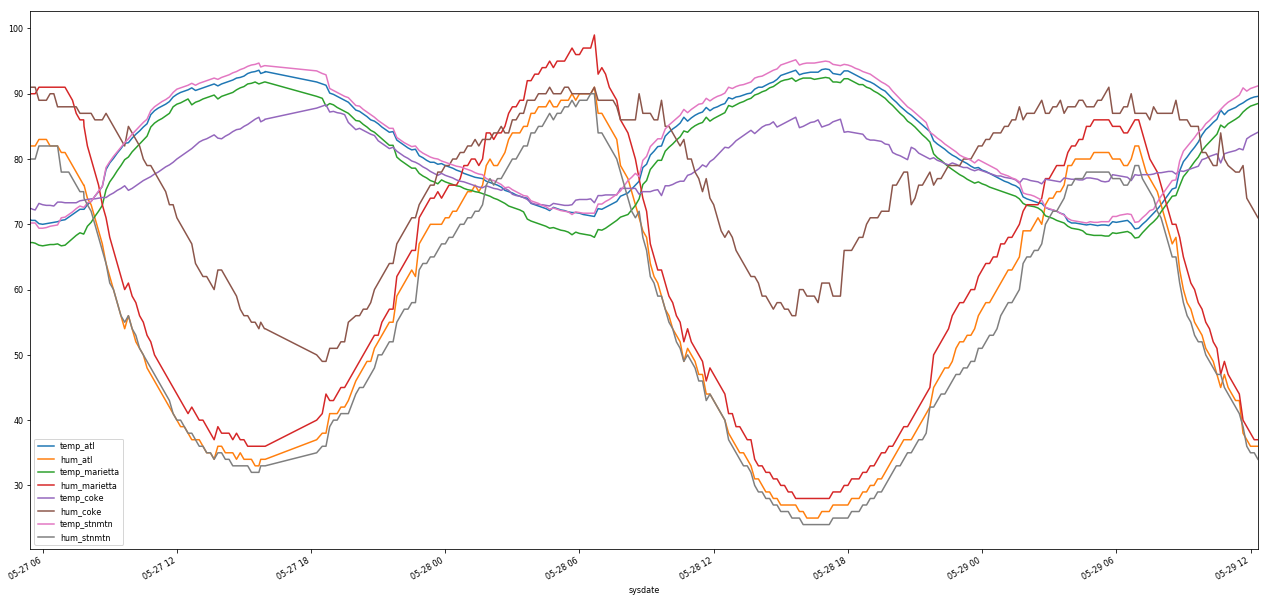

In [54]:
outside.plot(figsize=(22,11))

<font color=gray>step 5 - Present external temperatures.</font>

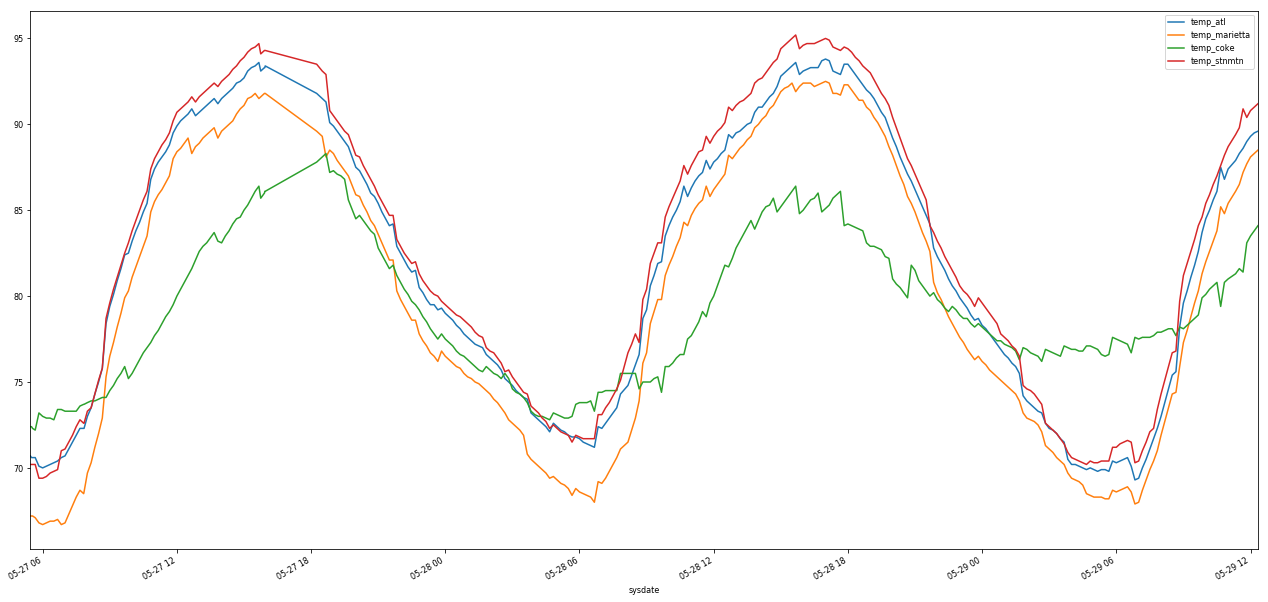

In [55]:
outside.drop(columns=['hum_atl', 'hum_coke','hum_stnmtn', 'hum_marietta']).plot(figsize=(22,11))

<font color=gray>step 6 - Present external humidities.</font>

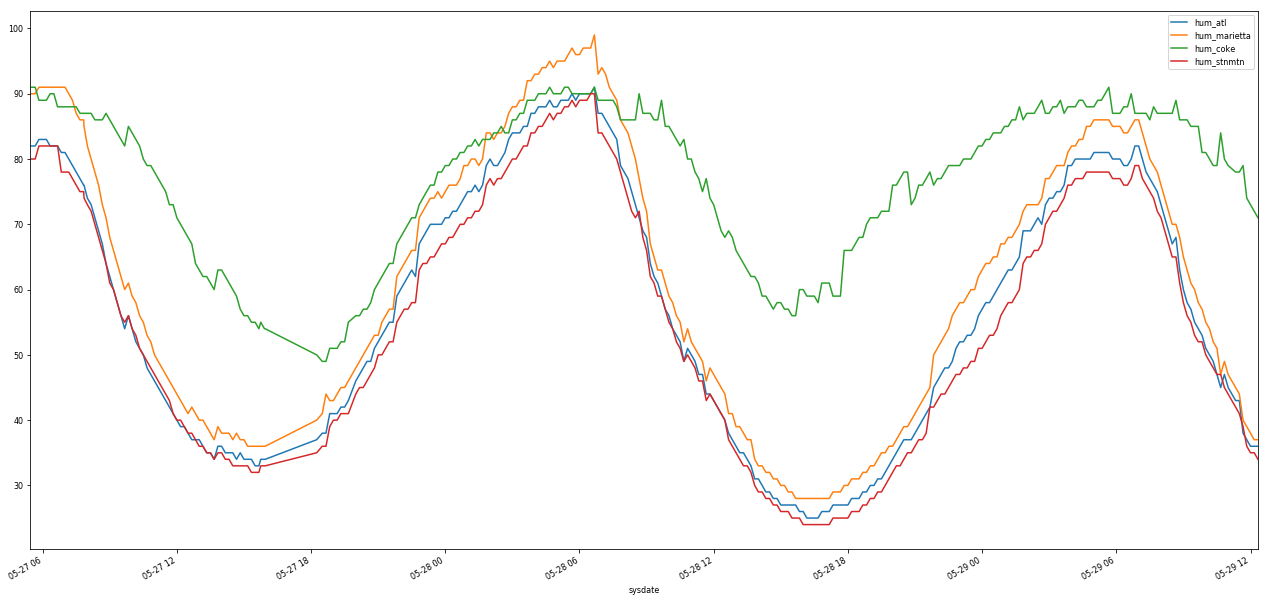

In [56]:
outside.drop(columns=['temp_atl', 'temp_coke','temp_stnmtn', 'temp_marietta']).plot(figsize=(22,11))

<a id='section2'></a>
# <font color=darkpink>Section 2: Process Home climate (Internal Data)</font>
<a href ='#top'>Jump to Table of Contents</a>


<a id='sec2pt1'></a>
## <font color=darkblue>Part 1 - Read, write and remove dups from Internal Data CSV spreadsheet</font>


<a href ='#top'>Jump to Table of Contents</a>

<font color=gray>step 1 - Edit and Build step combined - See Section 1 for step by step details</font>


In [57]:
import csv as csv
import datetime
import json
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

# Set the appropriate path

#------------------------------------------------#
# Set processing parameters and directives
#------------------------------------------------#
matplotlib.use('nbagg')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,12)
plt.rcParams['font.size'] = 8
#------------------------------------------------#
# Set the appropriate path
#------------------------------------------------#


home_path = 'C:\\users\\bucbo_000\\Desktop'

if os.path.isdir(home_path):
    os.chdir(home_path)
else:
    home_path='./'
    
#Open files for read and write - write headings first
data_file = open('mqtt.txt', "r", encoding = 'utf-8')     

# Convert json to list of dictionaries, then parse accordingly

f1 = data_file.readlines()
my_df = list()
for x in iter(f1):
    try:
        data = json.loads(x)
        df = data #json_normalize(data)
        my_df.append(df)
    except:
        print("skipping: JSON format invalid for:", x)
        
cnt_accept = 0
cnt_reject =0
content_df = list()
for i in enumerate(my_df):
     for k,v in enumerate(i):
        #print(i)
        #print("v=", v)
        #if str(v).startswith('{\'device') and "loc" in str(v):
        if "env" not in str(i):
            content_df.append(my_df)
            cnt_accept +=1
        else:
            print("skipping: JSON content invalid")
            cnt_reject +=1
            
print("We now have", cnt_accept, "records to use after cleaning",cnt_reject, "rows")

cnt_accept = 0
cnt_reject = 0

# Define output file and header line
with open('mqtt.csv', 'w', newline='') as csvfile:
    fieldnames = ['device','sysdate', 'temp', 'hum', 'state']
# This opens the `DictWriter`.
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#
# Write out the header row (this only needs to be done once!).
    writer.writeheader()
#
# Read in, Write out and Loop 
#
    for a_df in my_df:
        try:
            writer.writerow(a_df)
            cnt_accept += 1
        except:
            print("Unable to parse, skipping...")
            cnt_reject += 1

print("We now have", cnt_accept, "Dictionary records to use after cleaning",cnt_reject, "rows")




skipping: JSON format invalid for: {"device":"B8:27:EB:2D:40:28","sysdate":"2019-05-24 20:11","temp:73.4,"hum":54.0,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-24 20:11","temp:77.5399986267,"hum":48.7999992371,"state":"Scattered_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-24 20:11","temp:80.0600013733,"hum":46.2999992371,"state":"0}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-24 20:12","temp:80.0600013733,"hum":46.2999992371,"state":"0}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-24 20:12","temp:77.5399986267,"hum":48.9000015259,"state":"Scattered_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:2D:40:28","sysdate":"2019-05-24 20:12","temp:73.4,"hum":51.0,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-24 20:13","temp:80.0600013733,"hum":

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 00:47","temp:78.9800006866,"hum":46.2999992371,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 00:47","temp:76.2800006866,"hum":49.0999984741,"state":"Scattered_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 00:48","temp:78.9800006866,"hum":46.4000015259,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 00:48","temp:76.4600013733,"hum":49.0,"state":"Scattered_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 00:49","temp:78.9800006866,"hum":46.5999984741,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 00:50","temp:78.9800006866,"hum":46.5999984741,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 00:5

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 05:22","temp:76.8199993134,"hum":53.0,"state":"Scattered_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 05:23","temp:76.6399986267,"hum":53.0999984741,"state":"Scattered_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 05:23","temp:78.9800006866,"hum":48.9000015259,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 05:24","temp:78.9800006866,"hum":48.9000015259,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 05:24","temp:76.6399986267,"hum":53.0999984741,"state":"Scattered_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 05:25","temp:76.6399986267,"hum":53.0999984741,"state":"Scattered_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 10:06","temp:76.6399986267,"hum":52.9000015259,"state":"Few_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 10:07","temp:76.4600013733,"hum":52.7999992371,"state":"Few_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 10:07","temp:78.8,"hum":49.0999984741,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 10:08","temp:78.8,"hum":49.0999984741,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 10:08","temp:76.4600013733,"hum":52.7999992371,"state":"Few_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 10:09","temp:78.8,"hum":49.0999984741,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 10:10","temp:76.460001373


skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 14:42","temp:79.5199993134,"hum":48.5,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 14:42","temp:76.4600013733,"hum":51.0,"state":"Few_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 14:43","temp:76.4600013733,"hum":51.0,"state":"Few_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 14:43","temp:79.5199993134,"hum":48.5,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 14:44","temp:76.4600013733,"hum":51.0,"state":"Few_clouds"}

skipping: JSON format invalid for: {"device":"B8:27:EB:37:B0:F8","sysdate":"2019-05-25 14:44","temp:79.5199993134,"hum":48.5,"state":"0"}

skipping: JSON format invalid for: {"device":"B8:27:EB:76:5F:45","sysdate":"2019-05-25 14:45","temp:76.4600013733,"hum":51.0,"state":"Few_

skipping: JSON content invalid
skipping: JSON content invalid
skipping: JSON content invalid
skipping: JSON content invalid
skipping: JSON content invalid
skipping: JSON content invalid
We now have 39064 records to use after cleaning 6 rows
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unable to parse, skipping...
Unabl

In [58]:
int_df = pd.read_csv(home_path + "\\mqtt.csv", usecols=range(0,4)) 

#######################################################
#
int_df = int_df.drop_duplicates()
#
#######################################################

int_df['sysdate'] = pd.to_datetime(int_df['sysdate'])



<a id='sec2pt2'></a>
## <font color=darkblue>Part 2 - Review internal data and metadata</font>

<a href ='#top'>Jump to Table of Contents</a>

<font color=gray>step 1 - Review and assess.</font>

In [59]:
print("------------------------------------")
print("Internal Data has ", int_df.shape[0], "Rows and", int_df.shape[1], "Columns of types:")
print("------------------------------------")
print(int_df.dtypes)
print(" ")
print("------------------------------------")
print(f"External Data nulls search:")
print("------------------------------------")
print(int_df.isnull().sum())
print(" ")
print("------------------------------------")
print(f"Weather Data counts:")
print("------------------------------------")
print(int_df.dropna().count())
print(" ")
print("------------------------------------")
print(f"External Data statistics:")
print("------------------------------------")
int_df.describe()
print(f"device cardinality:", int_df['device'].value_counts())
print(f"temp mean:", int_df['temp'].value_counts().mean())
print(f"humidity mean:", int_df['hum'].value_counts().mean())

------------------------------------
Internal Data has  19494 Rows and 4 Columns of types:
------------------------------------
device             object
sysdate    datetime64[ns]
temp              float64
hum               float64
dtype: object
 
------------------------------------
External Data nulls search:
------------------------------------
device     0
sysdate    0
temp       0
hum        0
dtype: int64
 
------------------------------------
Weather Data counts:
------------------------------------
device     19494
sysdate    19494
temp       19494
hum        19494
dtype: int64
 
------------------------------------
External Data statistics:
------------------------------------
device cardinality: B8:27:EB:76:5F:45    5386
B8:27:EB:2D:40:28    5276
B8:27:EB:37:B0:F8    5105
B8:27:EB:A9:D4:C2    3727
Name: device, dtype: int64
temp mean: 406.125
humidity mean: 141.2608695652174


<font color=gray>step 2 - Review temp for outliers</font>

<font color=red>The temperatures have few points beyond reasonable temp. We will remove these downstream.</font>

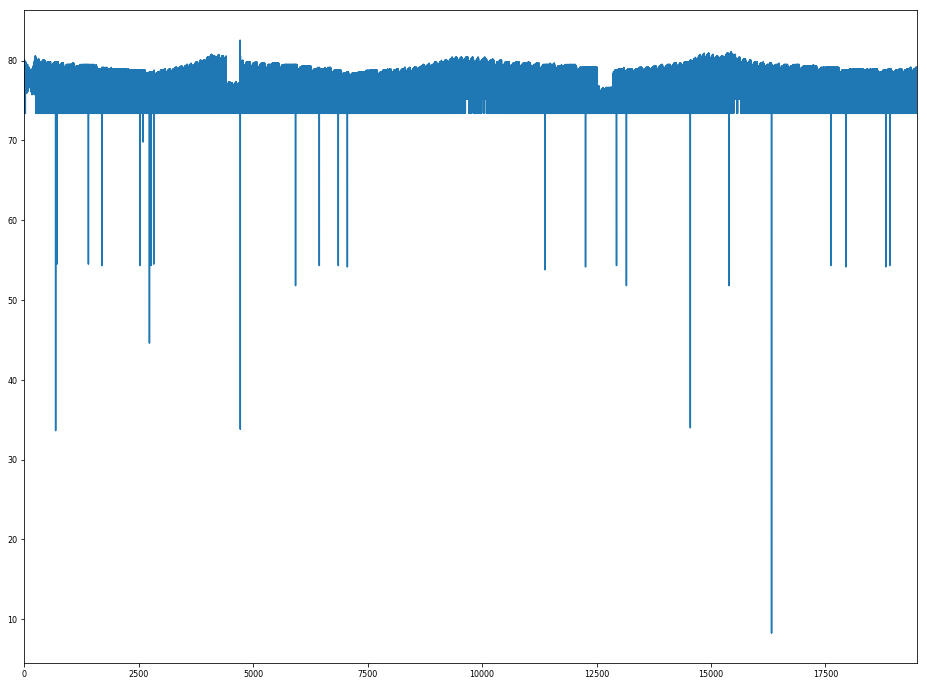

In [60]:
int_df['temp'].plot()

<a id='sec2pt3'></a>
## <font color=darkblue>Part 3 - Rename columns, replace data and build index.</font>

<a href ='#top'>Jump to Table of Contents</a>


<font color=gray>step 1 - Change devices to match room location</font>

In [61]:
int_df.replace({'device': {'B8:27:EB:76:5F:45': 'Living Room', 'B8:27:EB:2D:40:28': 'Master Bedroom', 'B8:27:EB:37:B0:F8': 'Guest Bedroom', 'B8:27:EB:A9:D4:C2': 'Kitchen'}}, inplace=True)

<font color=gray>step 2 - COLUMN renaming step to make columns meaningful"</font>

In [62]:
#int_df.rename(columns={'state': 'forecast'},inplace=True)
int_df.rename(columns={'device': 'room'}, inplace=True)

<font color=gray>step 3 - Set sysdate as index for internal data

In [63]:
int_df.set_index(['sysdate'], inplace=True)

<a id='sec2pt4'></a>
## <font color=darkblue>Part 4 - Breakout DataFrames by location.</font>

<a href ='#top'>Jump to Table of Contents</a>

<font color=gray>step 1 - Create new dataframes by device or internal location</font>
### <font color=blue>As this is taken during the summer, we can assume any temp below 70 F is to be removed.</font>

In [64]:
mb = int_df[int_df['room'] == 'Master Bedroom']
lr = int_df[int_df['room'] == 'Living Room']
gb = int_df[int_df['room'] == 'Guest Bedroom']
kt = int_df[int_df['room'] == 'Kitchen']
mb = mb[mb['temp'] > 69]
mb = mb[mb['temp'] < 90]
lr = lr[lr['temp'] > 69]
lr = lr[lr['temp'] < 90]
gb = gb[gb['temp'] > 69]
gb = gb[gb['temp'] < 90]
kt = kt[kt['temp'] > 69]
kt = kt[kt['temp'] < 90]

<a id='sec2pt5'></a>
## <font color=darkblue>Part 5 - Visualize and Assess Internal Data.</font>

<a href ='#top'>Jump to Table of Contents</a>

<font color=gray> step 1 - Display data counts by device</font>

In [65]:
int_df.groupby(['room']).count()


,temp,hum
room,,
Guest Bedroom,5105,5105
Kitchen,3727,3727
Living Room,5386,5386
Master Bedroom,5276,5276


<font color=gray>step 2 - Visualize the internal data's metadata

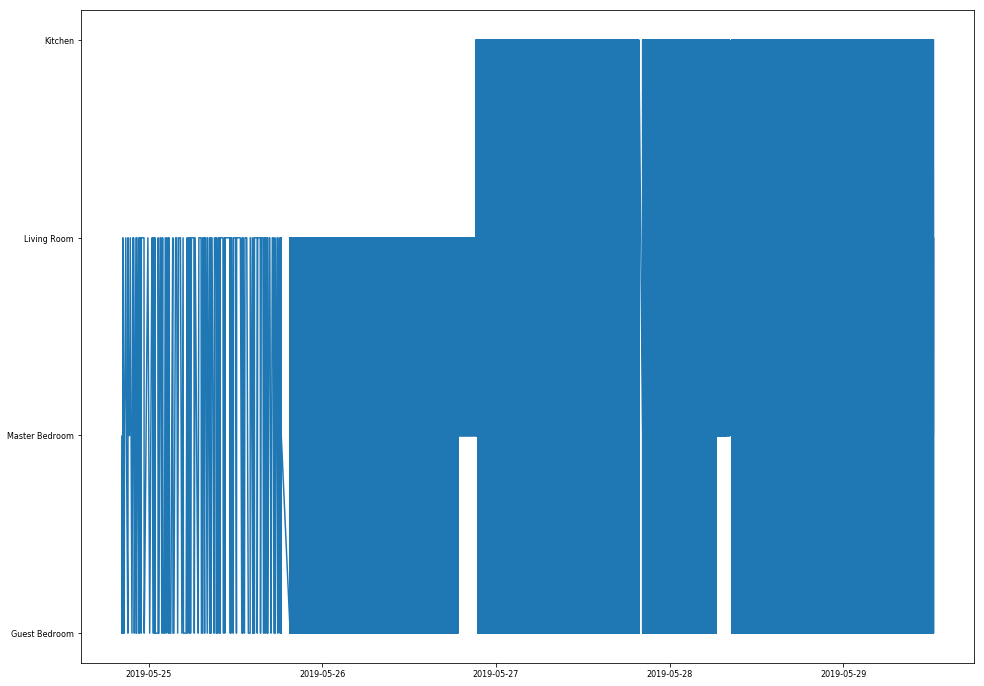

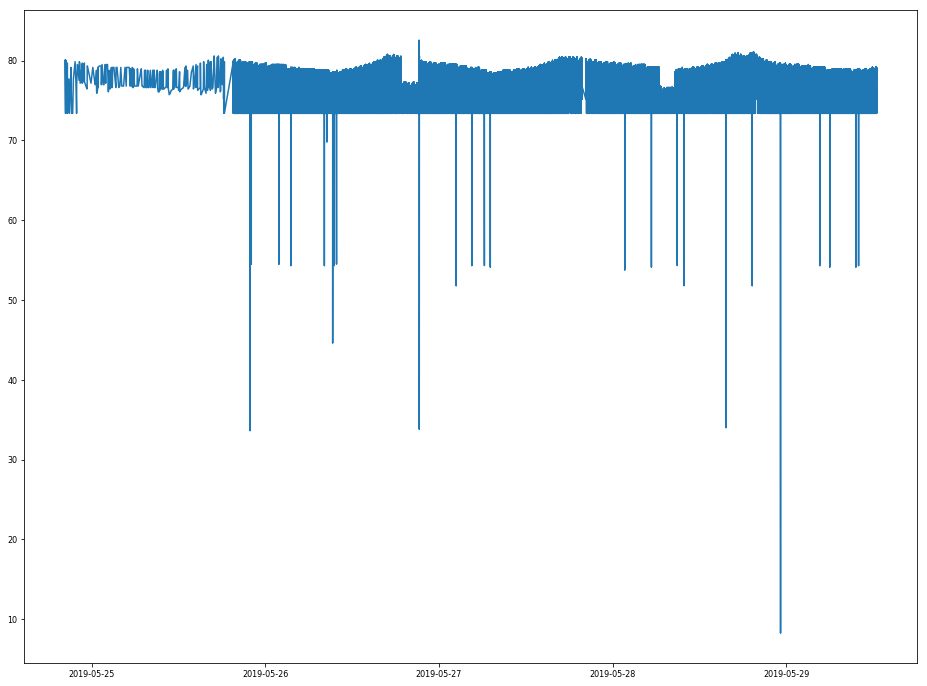

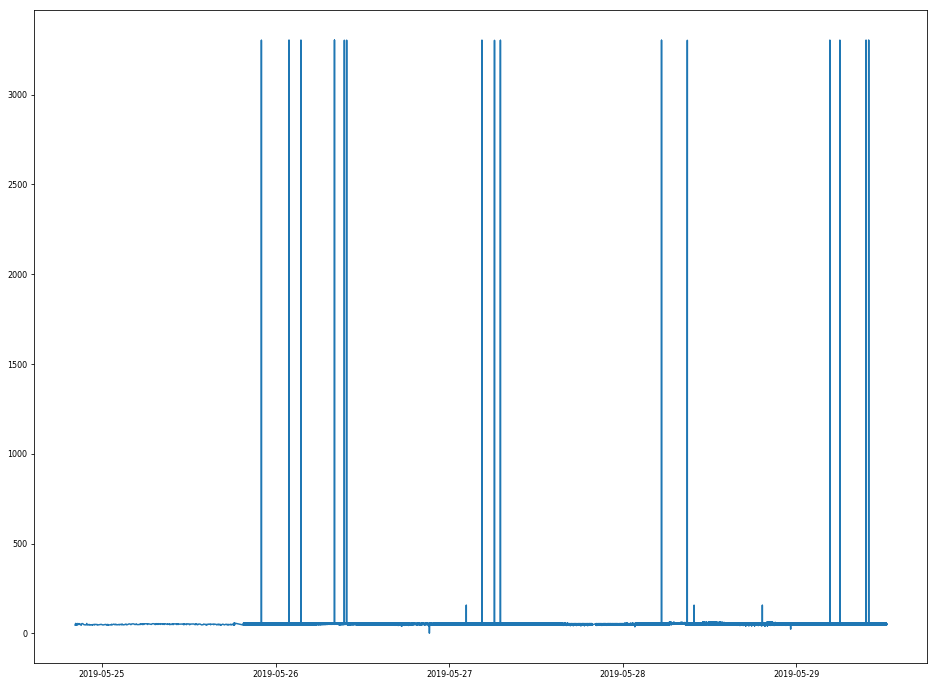

In [66]:
    for col in int_df.columns:
        plot_data = int_df[col].dropna()
        fig, ax = plt.subplots()
        ax.plot(plot_data.index.values, plot_data.values, label=col)

<font color=gray>step 3 - Merge internal data groups</font>

In [67]:
br = mb.join(gb, how='left',  lsuffix='_mstr', rsuffix='_guest')
lk = lr.join(kt, how='left', lsuffix='_living', rsuffix='_kit')
inside = br.join(lk, how='left')

<font color=gray>step 4- Visualize internal data</font>


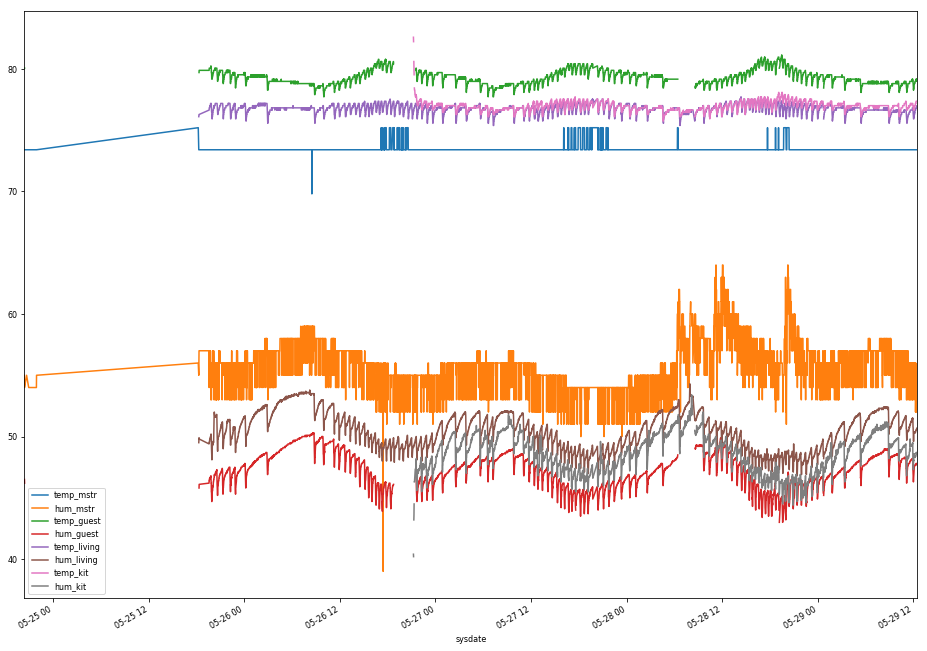

In [68]:
inside.plot()

<a id='section3'></a>
# <font color=darkpink>Section 3: Visualize the data</font>
<a href ='#top'>Jump to Table of Contents</a>

<a id='sec3pt1'></a>
## <font color=darkblue>Part 1 - Present external environments</font>


<a href ='#top'>Jump to Table of Contents</a>

<font color=gray>step 1 - Present humidity corresponding to temp.</font>

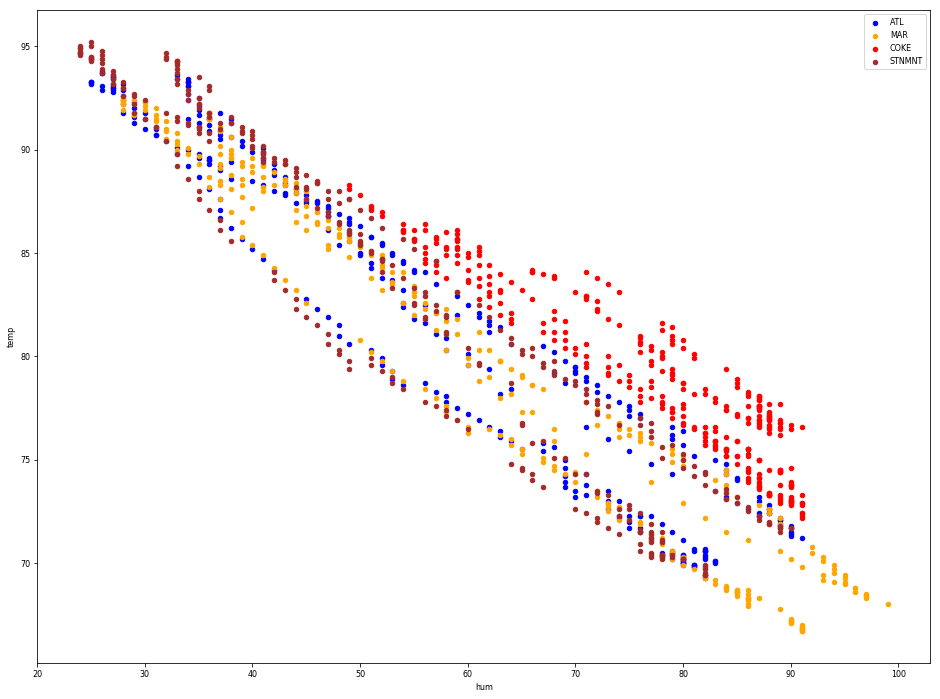

In [69]:
ax = ext_atl.plot(kind="scatter", x='hum', y="temp",label="ATL", c='b')
ax2 = ext_marietta.plot(kind="scatter", x='hum', y="temp",label="MAR", c='orange', ax = ax)
ax3 = ext_coke.plot(kind="scatter", x='hum', y="temp",label="COKE", c='r' , ax = ax)
ax4 = ext_stonemtn.plot(kind="scatter", x='hum', y="temp",label="STNMNT", c='brown' , ax = ax)

<font color=gray>step 2 - Show the weather elements standard deviations between parts of city</font>

In [70]:
print("######################################")
print("#Weather Standard Deviations between parts of the city.")
print("######################################")
print("# Keys: ext_atl      General ATL weather ")
print("#       ext_coke     Coca-Cola Olypmic Village")
print("#       ext_marietta KFC 40' chicken in Marietta")
print("#       ext_stonemtn Stone Mountain Park, Stone Mtn., Ga.")
print("#")
print('# ext_atl      temp & hum standard deviation: {0:4.2f} \t{1:4.2f}'.format(ext_atl['temp'].std(), ext_atl['hum'].std()))
print('# ext_coke     temp & hum standard deviation: {0:4.2f} \t{1:4.2f}'.format(ext_coke['temp'].std(), ext_coke['hum'].std()))
print('# ext_marietta temp & hum standard deviation: {0:4.2f} \t{1:4.2f}'.format(ext_marietta['temp'].std(), ext_marietta['hum'].std()))
print('# ext_stonemtn temp & hum standard deviation: {0:4.2f} \t{1:4.2f}'.format(ext_stonemtn['temp'].std(), ext_stonemtn['hum'].std()))


######################################
#Weather Standard Deviations between parts of the city.
######################################
# Keys: ext_atl      General ATL weather 
#       ext_coke     Coca-Cola Olypmic Village
#       ext_marietta KFC 40' chicken in Marietta
#       ext_stonemtn Stone Mountain Park, Stone Mtn., Ga.
#
# ext_atl      temp & hum standard deviation: 8.00 	19.94
# ext_coke     temp & hum standard deviation: 4.13 	11.79
# ext_marietta temp & hum standard deviation: 8.41 	21.18
# ext_stonemtn temp & hum standard deviation: 8.32 	19.47


<font color=gray>step 3 - Show the Weather correlation between parts of city</font>

In [71]:
print("######################################")
print("# External Environment Correlation Information.")
print("######################################")
print("# Keys: ext_atl      General ATL weather ")
print("#       ext_coke     Coca-Cola Olypmic Village")
print("#       ext_marietta KFC 40' chicken in Marietta")
print("#       ext_stonemtn Stone Mountain Park, Stone Mtn., Ga.")
print("#")
print('# Correlate ext_atl to ext_coke     Temperature:{0:4.1f}%'.format(ext_atl.corrwith(ext_coke)[0] * 100))
print('#                                   Humidity:{0:4.1f}%'.format(ext_atl.corrwith(ext_coke)[1] * 100))
print("#")
print('# Correlate ext_atl to ext_marietta Temperature:{0:4.1f}%'.format(ext_atl.corrwith(ext_marietta)[0] * 100))
print('#                                   Humidity:{0:4.1f}%'.format(ext_atl.corrwith(ext_marietta)[1] * 100))
print("#")
print('# Correlate ext_atl to ext_stonemtn Temperature:{0:4.1f}%'.format(ext_atl.corrwith(ext_stonemtn)[0] * 100))
print('#                                   Humidity:{0:4.1f}%'.format(ext_atl.corrwith(ext_stonemtn)[1] * 100))
print("#")

######################################
# External Environment Correlation Information.
######################################
# Keys: ext_atl      General ATL weather 
#       ext_coke     Coca-Cola Olypmic Village
#       ext_marietta KFC 40' chicken in Marietta
#       ext_stonemtn Stone Mountain Park, Stone Mtn., Ga.
#
# Correlate ext_atl to ext_coke     Temperature:86.7%
#                                   Humidity:82.9%
#
# Correlate ext_atl to ext_marietta Temperature:99.7%
#                                   Humidity:99.8%
#
# Correlate ext_atl to ext_stonemtn Temperature:99.9%
#                                   Humidity:99.7%
#


<font color=gray>step 3 - </font>

<a id='sec3pt2'></a>
## <font color=darkblue>Part 2 - Present internal environments</font>


<a href ='#top'>Jump to Table of Contents</a>

<font color=gray>step 1 - Present humidity corresponding to temp.</font>

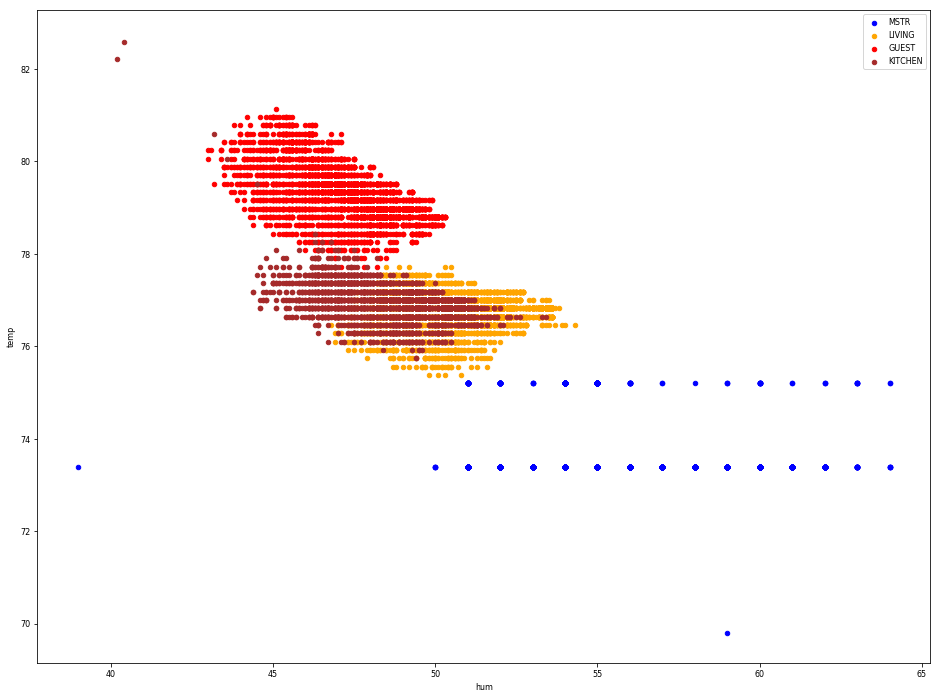

In [72]:
ax = mb.plot(kind="scatter", x='hum', y="temp",label="MSTR", c='b')
ax2 = lr.plot(kind="scatter", x='hum', y="temp",label="LIVING", c='orange', ax = ax)
ax3 = gb.plot(kind="scatter", x='hum', y="temp",label="GUEST", c='r' , ax = ax)
ax4 = kt.plot(kind="scatter", x='hum', y="temp",label="KITCHEN", c='brown' , ax = ax)

<font color=gray>step 2 - Show the environment elements standard deviations between parts of home</font>

In [73]:
print("######################################")
print("#Environment Standard Deviations between parts of the home.")
print("######################################")
print("# Keys: kt           Kitchen - nearest thermostat ")
print("#       lr           Living Room")
print("#       mb           Master Bed")
print("#       gb           Guest Bed")
print("#")
print('# kt      temp & hum standard deviation: {0:4.2f} \t{1:4.2f}'.format(kt['temp'].std(), kt['hum'].std()))
print('# lr      temp & hum standard deviation: {0:4.2f} \t{1:4.2f}'.format(lr['temp'].std(), lr['hum'].std()))
print('# mb      temp & hum standard deviation: {0:4.2f} \t{1:4.2f}'.format(mb['temp'].std(), mb['hum'].std()))
print('# gb      temp & hum standard deviation: {0:4.2f} \t{1:4.2f}'.format(gb['temp'].std(), gb['hum'].std()))

######################################
#Environment Standard Deviations between parts of the home.
######################################
# Keys: kt           Kitchen - nearest thermostat 
#       lr           Living Room
#       mb           Master Bed
#       gb           Guest Bed
#
# kt      temp & hum standard deviation: 0.38 	1.53
# lr      temp & hum standard deviation: 0.36 	1.50
# mb      temp & hum standard deviation: 0.37 	1.99
# gb      temp & hum standard deviation: 0.57 	1.40


<font color=gray>step 3 - Show the environment correlations between parts of home</font>

In [74]:
print("######################################")
print("#Environment Correlations between parts of the home.")
print("######################################")
print("# Keys: kt           Kitchen - nearest thermostat ")
print("#       lr           Living Room")
print("#       mb           Master Bed")
print("#       gb           Guest Bed")
print("#")
print('# Correlate kt to lr     Temperature:{0:4.1f}%'.format(kt.corrwith(lr)[0] * 100))
print('#                           Humidity:{0:4.1f}%'.format(kt.corrwith(lr)[1] * 100))
print("#")
print('# Correlate kt to mb      Temperature:{0:4.1f}%'.format(kt.corrwith(mb)[0] * 100))
print('#                            Humidity:{0:4.1f}%'.format(kt.corrwith(mb)[1] * 100))
print("#")
print('# Correlate kt to gb      Temperature:{0:4.1f}%'.format(kt.corrwith(gb)[0] * 100))
print('#                            Humidity:{0:4.1f}%'.format(kt.corrwith(gb)[1] * 100))

######################################
#Environment Correlations between parts of the home.
######################################
# Keys: kt           Kitchen - nearest thermostat 
#       lr           Living Room
#       mb           Master Bed
#       gb           Guest Bed
#
# Correlate kt to lr     Temperature:68.4%
#                           Humidity:94.5%
#
# Correlate kt to mb      Temperature:24.3%
#                            Humidity:17.5%
#
# Correlate kt to gb      Temperature:75.6%
#                            Humidity:87.6%


<a id='section4'></a>
# <font color=darkpink>Section 4: Comparative Analysis</font>
<a href ='#top'>Jump to Table of Contents</a>

<font color=gray>step 3 - Show the correlation between humidity and temp</font>

In [75]:
print("#---------------------------------#")
print("External temp correlation to forecast")
print("#---------------------------------#")
print(f"External correlation:",ext_df[['temp', 'forecast']].corr())
print(" ")
print(f"External covariance", ext_df[['temp', 'forecast']].cov())
print(" ")
print("#---------------------------------#")
print("External temp correlation to humidity")
print("#---------------------------------#")
print(f"External correlation:",ext_df[['temp', 'hum']].corr())
print(" ")
print(f"External covariance", ext_df[['temp', 'hum']].cov())
print(" ")
print("#---------------------------------#")
print("Internal temp correlation to humidity")
print("#---------------------------------#")
print(f"Internal correlation", int_df[['temp', 'hum']].corr())
print(" ")
print(f"Internal covariance",  int_df[['temp', 'hum']].cov())
print(" ")
print(" ")
print("#---------------------------------#")
print("Internal temp and humidity correlation to external temp and humidity")
print("#---------------------------------#")
ext_df.corrwith(int_df, axis=0)

#---------------------------------#
External temp correlation to forecast
#---------------------------------#
External correlation:       temp
temp   1.0
 
External covariance           temp
temp  59.93607
 
#---------------------------------#
External temp correlation to humidity
#---------------------------------#
External correlation:           temp       hum
temp  1.000000 -0.932601
hum  -0.932601  1.000000
 
External covariance             temp         hum
temp   59.936070 -147.679693
hum  -147.679693  419.827018
 
#---------------------------------#
Internal temp correlation to humidity
#---------------------------------#
Internal correlation           temp       hum
temp  1.000000 -0.289038
hum  -0.289038  1.000000
 
Internal covariance            temp          hum
temp   5.816840   -62.922718
hum  -62.922718  8147.362655
 
 
#---------------------------------#
Internal temp and humidity correlation to external temp and humidity
#---------------------------------#


temp    0.055700
hum     0.034905
dtype: float64

<font color=gray>step 2 Visualize internal and external variables.</font>

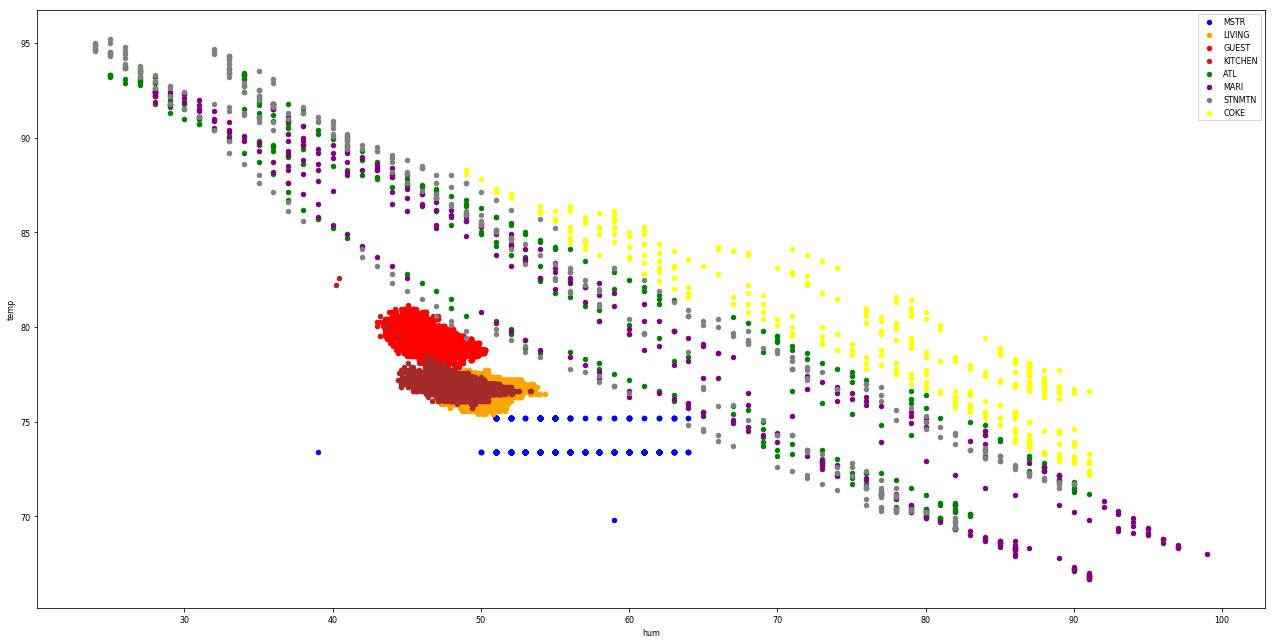

In [76]:
ax = mb.plot(kind="scatter", x='hum', y="temp",label="MSTR", c='b', figsize = (22,11))
ax2 = lr.plot(kind="scatter", x='hum', y="temp",label="LIVING", c='orange', ax = ax)
ax3 = gb.plot(kind="scatter", x='hum', y="temp",label="GUEST", c='r' , ax = ax)
ax4 = kt.plot(kind="scatter", x='hum', y="temp",label="KITCHEN", c='brown' , ax = ax)
ax5 = ext_atl.plot(kind="scatter", x='hum', y="temp",label="ATL", c='green' , ax = ax)
ax6 = ext_marietta.plot(kind="scatter", x='hum', y="temp",label="MARI", c='purple' , ax = ax)
ax7 = ext_stonemtn.plot(kind="scatter", x='hum', y="temp",label="STNMTN", c='gray' , ax = ax)
ax8 = ext_coke.plot(kind="scatter", x='hum', y="temp",label="COKE", c='yellow' , ax = ax)